This code is modified version of /Users/paban23/Research/PhD/S-MODE/SD_ADCP_Analyses/Final_figure_codes/PDF_comparison.ipynb

In [1]:
import glob
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import seawater as sw
from scipy import linalg
import gsw
import sys
sys.path.append('/Users/paban23/Research/PhD/S-MODE/S-MODE-IOP/IOP_codes')
#sys.path.insert(0,'/home/pab21003/PhD/Practice/NRT/Maps-main/tools/')
from itertools import combinations
# from utils import *
from utils import *
from scipy import stats
# from spectra_utils import *
from scipy import signal
from scipy.special import gammainc
from scipy.stats import kurtosis, skew
from matplotlib.patches import FancyArrow
from matplotlib.patches import Polygon
import matplotlib.image as mpimg

In [2]:
x0 = '2021-11-06T15:40:00.000000000'    #'2021-11-06T15:40:00.000000000'
x = '2021-11-06T20:10:00.000000000'    #    '2021-11-06T20:10:00.000000000'
x1 = '2021-11-06T20:20:00.000000000'


In [3]:
## delta of variables u, v,
def delta(ds1,ds2):
    u = xr.DataArray(ds1.u - ds2.u)
    ds = xr.Dataset({'u':u})
    ds['v'] = xr.DataArray(ds1.v - ds2.v)
    return ds

In [8]:
t1 = '2021-11-06T12:40:00.000000000'    #'2021-11-06T12:40:00.000000000'
t2 = '2021-11-06T21:10:00.000000000'  

In [4]:
oc = xr.open_dataset('../Data/oc_5min.nc')

In [5]:
oc = oc.assign_coords({'cell_depth':oc.depth.values[0]})

In [6]:
depths = oc.depth.values[0][:-1]

In [14]:
oc_sub = oc.sel(time=slice(t1,t2)).interp(cell_depth=depths)

In [15]:
sd1072_sub = xr.open_dataset('../Data/PDF_data_sd1072_sub.nc') 
sd1073_sub = xr.open_dataset('../Data/PDF_data_sd1073_sub.nc') 

In [16]:
round(basic_stats(sd1073_sub.u.diff("time").stack(z =("time","cell_depth")).values)[1] , 2)

0.03

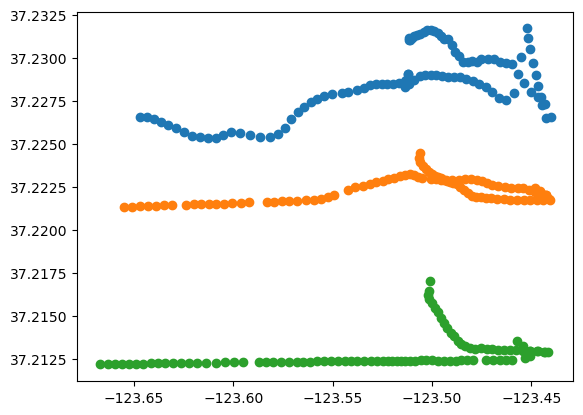

In [17]:
plt.scatter(oc_sub.longitude,oc_sub.latitude)
plt.scatter(sd1072_sub.longitude,sd1072_sub.latitude)
plt.scatter(sd1073_sub.longitude,sd1073_sub.latitude)

In [18]:
del_oc_1072 = delta(oc_sub, sd1072_sub)
del_1072_1073 = delta(sd1072_sub, sd1073_sub)

In [19]:
oc_delu, oc_delv = oc_sub.u.diff("time").stack(z =("time","cell_depth")).values ,\
                             oc_sub.v.diff("time").stack(z =("time","cell_depth")).values 
sd72_delu, sd72_delv = sd1072_sub.u.diff("time").stack(z =("time","cell_depth")).values ,\
                             sd1072_sub.v.diff("time").stack(z =("time","cell_depth")).values
sd73_delu, sd73_delv = sd1073_sub.u.diff("time").stack(z =("time","cell_depth")).values ,\
                             sd1073_sub.v.diff("time").stack(z =("time","cell_depth")).values

In [20]:
##  normal distribution x and y 
f_u_ocenus_72, x_u_ocenus_72 = normal_dist(oc_delu)
f_v_ocenus_72, x_v_ocenus_72 = normal_dist(oc_delv)


In [21]:
kw_oc_72 = {
    'bins': np.arange(-0.15,0.15,0.005),
    'density': True,
     'rwidth' : 0.8,
    'histtype' : 'step',
    'color' : 'blue',
    'linewidth'  : 1.5
}

kw_72_73 = {
    'bins': np.arange(-0.15,0.15,0.005),
    'density': True,
     'rwidth' : 0.8,
    'histtype' : 'step',
    'color' : 'green',
    'linewidth'  : 1.5
}
kw_73 = {
    'bins': np.arange(-0.15,0.15,0.005),
    'density': True,
     'rwidth' : 0.8,
    'histtype' : 'step',
    'color' : 'red',
    'linewidth'  : 1.5
}
kw_err_vel = {
    'bins': np.arange(-0.03,0.03,0.003),
    'density': True,
     'rwidth' : 0.8,
    'histtype' : 'step',
    'color' : 'red',
    'linewidth'  : 1.5
}
kw_err_vel_73 = {
    'bins': np.arange(-0.03,0.03,0.003),
    'density': True,
     'rwidth' : 0.8,
    'histtype' : 'step',
    'color' : 'blue',
    'linewidth'  : 1.5
}
kw_n_ds_oc_72 = {
    'linestyle' : '--',
    'color' : 'blue', 
    'linewidth' :0.9
}

kw_n_ds_72_73 = {
    'linestyle' : '--',
    'color' : 'green', 
    'linewidth' :0.9
}

In [22]:
f_u_ocenus_72_x, x_u_ocenus_72_x = normal_dist(del_oc_1072.u)
f_v_ocenus_72_x, x_v_ocenus_72_x = normal_dist(del_oc_1072.v)

f_u_72_73, x_u_72_73 = normal_dist(del_1072_1073.u)
f_v_72_73, x_v_72_73 = normal_dist(del_1072_1073.v)

In [23]:
kw_oc_72_x = {
    'bins': np.arange(-0.15,0.15,0.005),
    'density': True,
     'rwidth' : 0.8,
    'histtype' : 'step',
    'color' : 'purple',
    'linewidth'  : 1.5
}

kw_72_73_x = {
    'bins': np.arange(-0.15,0.15,0.005),
    'density': True,
     'rwidth' : 0.8,
    'histtype' : 'step',
    'color' : 'black',
    'linewidth'  : 1.5
}
kw_73_x = {
    'bins': np.arange(-0.15,0.15,0.005),
    'density': True,
     'rwidth' : 0.8,
    'histtype' : 'step',
    'color' : 'red',
    'linewidth'  : 1.5
}

kw_n_ds_oc_72_x = {
    'linestyle' : '--',
    'color' : 'purple', 
    'linewidth' :0.9
}

kw_n_ds_72_73_x = {
    'linestyle' : '--',
    'color' : 'black', 
    'linewidth' :0.9
}

In [24]:
idepth = 0
lon0 = -123.57
lat0 = 37.21
oc_x, oc_y = ll2xy(oc_sub.isel(cell_depth=idepth).sel(time=slice(x0,x1)).longitude,
          oc_sub.isel(cell_depth=idepth).sel(time=slice(x0,x1)).latitude,
          lon0,
          lat0)

sd_x, sd_y = ll2xy(sd1072_sub.isel(cell_depth=idepth).sel(time=slice(x0,x)).longitude,
          sd1072_sub.isel(cell_depth=idepth).sel(time=slice(x0,x)).latitude,
          lon0,
          lat0)

sd_73x, sd_73y = ll2xy(sd1073_sub.isel(cell_depth=idepth).sel(time=slice(x0,x)).longitude,
          sd1073_sub.isel(cell_depth=idepth).sel(time=slice(x0,x)).latitude,
          lon0,
          lat0)

In [25]:
np.nanmean(abs(np.diff(sd_x))), np.nanmean(abs(np.diff(sd_73x))), np.nanmean(abs(np.diff(oc_x)))

(0.29349251882974065, 0.30454020955424405, 0.2644345300611114)

In [26]:
list_oc_72_comp = [del_oc_1072.u, del_oc_1072.v]
list_72_73_comp = [del_1072_1073.u, del_1072_1073.v]
list_single_plat = [oc_delu, sd72_delu, sd73_delu, oc_delv, sd72_delv, sd73_delv ]

x_loc = [0.008, 0.008] # for cross-platfrom
y_loc = [0.74, -0.57] # # for cross-platfrom
y_loc2 = [0.49, -0.8]

x_loc1 = [0.008,0.008,0.008,1.5,1.5,1.5]
y_loc1 = [0.74,0.49,0.26,0.74,0.49,0.26]

colors1 = ['blue', 'green', 'red','blue', 'green', 'red']
colors =['purple', 'black']
kw_vec = {
    'scale': 3.8,
    'pivot':'middle','width': 0.005,'headlength':5,'headwidth':5,
}

In [27]:
x_loc = [0.008, 0.008] # for cross-platfrom
y_loc = [0.85, -0.5] # # for cross-platfrom
y_loc2 = [0.75, -0.6]

x_loc1 = [0.008,0.008,0.008,1.511,1.511,1.511]
y_loc1 = [0.85,0.78,0.71,0.85,0.78,0.71]


In [28]:
# Define reference location
ref_lon, ref_lat = -123.57, 37.21  # Same as your reference point
delta_lat = 0.1  # Small latitude increment to find north direction

# Convert (ref_lon, ref_lat) and (ref_lon, ref_lat + delta_lat) to x, y coordinates
ref_x, ref_y = ll2xy(ref_lon, ref_lat, ref_lon, ref_lat)
north_x, north_y = ll2xy(ref_lon, ref_lat + delta_lat, ref_lon, ref_lat)

# Compute north direction vector
north_vec_x = north_x - ref_x
north_vec_y = north_y - ref_y

# Normalize for better scaling in the plot
scale_factor = .4  # Adjust size of the arrow
north_vec_x, north_vec_y = north_vec_x * scale_factor, north_vec_y * scale_factor

In [29]:
data = np.load("../Data/SD-ship_scatter_plot_data.npz")
u_oc = data["u_oc"]
u_sd1072 = data["u_sd1072"]
v_oc = data["v_oc"]
v_sd1072 = data["v_sd1072"]

In [30]:
omega = 2*np.pi/(3600*24) + 2*np.pi/(365*86400)
f = 2*omega*np.sin((37.21*np.pi)/180)

In [31]:
np.mean(abs(np.diff(oc_sub.isel(cell_depth=20).sel(time=slice(x0,x1)).v))/abs(np.diff(oc_x)))

0.09839405077393475

In [32]:
# ship dv/dx
u_lim = 0
np.mean(abs(np.diff(oc_sub.isel(cell_depth=idepth).sel(time=slice(x0,x1)).v[u_lim:-12]))/abs(np.diff(oc_x[u_lim:-12])))

0.1740939716694659

In [33]:
# SD72 dv/dx 
u_lim_2 = 0
np.mean(abs(np.diff(sd1072_sub.isel(cell_depth=idepth).sel(time=slice(x0,x)).v[u_lim_2:-9]))/abs(np.diff(sd_x[u_lim_2:-9])))

0.09498771705510992

In [34]:
# SD73 dv/dx
u_lim_3 = 0
np.mean(abs(np.diff(sd1073_sub.isel(cell_depth=idepth).sel(time=slice(x0,x)).v[u_lim_3:-12]))/abs(np.diff(sd_73x[u_lim_3:-12])))

0.0853189194111434

In [35]:
#ship du/dx
np.mean(abs(np.diff(oc_sub.isel(cell_depth=idepth).sel(time=slice(x0,x1)).u[u_lim:-12]))/abs(np.diff(oc_x[u_lim:-12]*1000)))/f

1.379287599798899

In [36]:
# SD72 du/dx
np.mean(abs(np.diff(sd1072_sub.isel(cell_depth=idepth).sel(time=slice(x0,x)).u[u_lim_2:-9]))/abs(np.diff(sd_x[u_lim_2:-9]*1000)))/f

1.5289210711775056

In [37]:
# SD73 du/dx
np.mean(abs(np.diff(sd1073_sub.isel(cell_depth=idepth).sel(time=slice(x0,x)).u[u_lim_3:-12]))/abs(np.diff(sd_73x[u_lim_3:-12]*1000)))/f

0.9212479621294006

In [38]:
kw_vec2 = {
    'scale': 7,        # Fine-tuned scale for optimal arrow length
    'pivot': 'middle',  # Keeps arrows centered
    'width': 0.003,    # Slightly thinner shafts for better visibility
    'headlength': 5,    # Increase for a sharper arrowhead
    'headwidth': 4.5,   # Fine-tuned to avoid overly thick heads
    'headaxislength': 4.8
    # Smooth transition from shaft to head
}

# kw_vec = {
#     'scale': 3.8,
#     'pivot':'middle','width': 0.005,'headlength':5,'headwidth':5,
# }

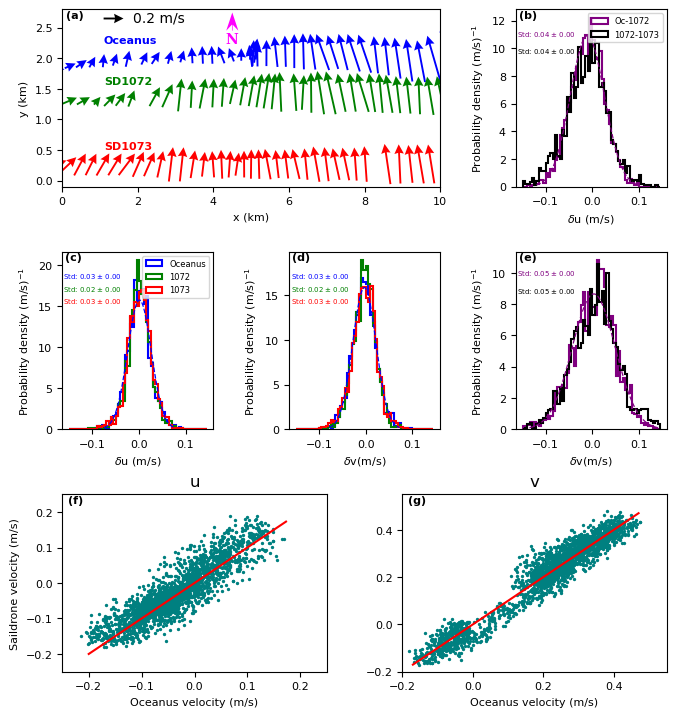

In [39]:
plt.style.use("default")
from matplotlib.gridspec import GridSpec
fac = 1.3
fig = plt.figure(figsize=(6*fac,13*fac))
gs=GridSpec(6,6, height_ratios=[2, 2, 2,2,1.5,1.5]) # 2 rows, 3 columns
ax1 = fig.add_subplot(gs[0,:4])

q_oc = ax1.quiver(oc_x, oc_y,
           oc_sub.isel(cell_depth=idepth).sel(time=slice(x0,x1)).u,
           oc_sub.isel(cell_depth=idepth).sel(time=slice(x0,x1)).v,**kw_vec,color='blue')
q_sd72 = ax1.quiver(sd_x, sd_y,
           sd1072_sub.isel(cell_depth=idepth).sel(time=slice(x0,x)).u,
           sd1072_sub.isel(cell_depth=idepth).sel(time=slice(x0,x)).v,**kw_vec,color='green')

q_sd73 = ax1.quiver(sd_73x, sd_73y,
           sd1073_sub.isel(cell_depth=idepth).sel(time=slice(x0,x)).u,
           sd1073_sub.isel(cell_depth=idepth).sel(time=slice(x0,x)).v,**kw_vec,color='red')


# ax1.quiver(0.2, 0.4, north_vec_x, north_vec_y, angles='xy', scale_units='xy', scale=2, color='magenta', width=0.005)
# ax1.text(north_vec_x+0.2, north_vec_y+0.2, 'N', fontsize=12, fontweight='bold', ha='center', va='bottom',color='magenta')


#plt.ylim(0,600)

ax1.quiverkey(q_oc, 0.16,0.95,0.2,
             label='0.2 m/s',
             coordinates='axes', labelpos='E',color='k')
# ax1.quiverkey(q_sd72, 0.11,0.88,0.2,
#              label='u (SD1072)',
#              coordinates='axes', labelpos='E')

# ax1.quiverkey(q_sd73, 0.11,0.81,0.2,
#              label='u (SD1073)',
#              coordinates='axes', labelpos='E')
plt.text( 0.11,0.81,"Oceanus",fontsize=8,fontweight='bold',transform=ax1.transAxes,color='blue')

plt.text( 0.11,0.58,"SD1072",fontsize=8,fontweight='bold',transform=ax1.transAxes,color='green')
plt.text( 0.11,0.21,"SD1073",fontsize=8,fontweight='bold',transform=ax1.transAxes,color='red')
ax1.set_xlabel('x (km)',fontsize=8)
ax1.set_ylabel('y (km)',fontsize=8)
ax1.set_ylim(-0.1,2.8)
ax1.set_xlim(0,10.0)
plt.text(0.01,0.95,"(a)",fontsize=8,fontweight='bold',transform=ax1.transAxes,color='k')
plt.tick_params(axis='both', which='major', labelsize=8)



ax2 = fig.add_subplot(gs[0,4:])
ax2.hist(np.ravel(del_oc_1072.u),**kw_oc_72_x)           #[0:50] for one leg
ax2.hist(np.ravel(del_1072_1073.u),**kw_72_73_x)       
ax2.legend(('Oc-1072', '1072-1073'),loc=1,fontsize=6)


ax2.plot(x_u_ocenus_72_x, f_u_ocenus_72_x,**kw_n_ds_oc_72_x)
ax2.set_xlabel('$\delta$u (m/s)',fontsize=8)
ax2.set_ylabel('Probability density (m/s)$^{-1}$',fontsize=8)
plt.text(0.02,0.95,"(b)",fontsize=8,fontweight='bold',transform=ax2.transAxes,color='k')
plt.tick_params(axis='both', which='major', labelsize=8)


ax3 = fig.add_subplot(gs[1,:2])
#fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(8,5.4))
#axs.set_aspect(1)
ax3.hist(np.ravel(oc_delu),**kw_oc_72)           #[0:50] for one leg
ax3.hist(np.ravel(sd72_delu),**kw_72_73)
ax3.hist(np.ravel(sd73_delu),**kw_73) 
ax3.legend(('Oceanus', '1072','1073'),loc=1,fontsize=6)
ax3.plot(x_u_ocenus_72, f_u_ocenus_72,**kw_n_ds_oc_72)
ax3.set_ylabel('Probability density (m/s)$^{-1}$',fontsize=8)
#ax3.yticks(fontsize=5)
plt.text(0.02,0.95,"(c)",fontsize=8,fontweight='bold',transform=ax3.transAxes,color='k')
ax3.set_xlabel('$\delta$u (m/s)',fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=8)

ax4 = fig.add_subplot(gs[1,2:4])
ax4.hist(np.ravel(oc_delv),**kw_oc_72)       
ax4.hist(np.ravel(sd72_delv),**kw_72_73)      
ax4.hist(np.ravel(sd73_delv),**kw_73)
ax4.plot(x_v_ocenus_72, f_v_ocenus_72,**kw_n_ds_oc_72 )
ax4.set_ylabel('Probability density (m/s)$^{-1}$',fontsize=8)
plt.text(0.02,0.95,"(d)",fontsize=8,fontweight='bold',transform=ax4.transAxes,color='k')
ax4.set_xlabel('$\delta$v(m/s)',fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=8)



ax5 = fig.add_subplot(gs[1,4:])    
ax5.hist(np.ravel(del_oc_1072.v),**kw_oc_72_x)
ax5.hist(np.ravel(del_1072_1073.v),**kw_72_73_x)
ax5.plot(x_v_ocenus_72_x, f_v_ocenus_72_x,**kw_n_ds_oc_72_x)
ax5.set_xlabel('$\delta$v(m/s)',fontsize=8)
plt.text(0.02,0.95,"(e)",fontsize=8,fontweight='bold',transform=ax5.transAxes,color='k')
plt.tick_params(axis='both', which='major', labelsize=8)


for n,i in enumerate(list_single_plat):
    ds =np.ravel(i)
    mean1, std1, skew1, kurt1,  median1 = basic_stats(ds)
    err_mean, err_median, err_std, err_skew = np.round(EstimateStandardError(ds[pd.notna(ds)],ci=0.95),3)
    plt.text(x_loc1[n],y_loc1[n],
             "Std: {:.2f} $\pm$ {:.2f}  ".format(round(std1, 2), round(err_std, 2)),
                                                                                    fontsize=5,
                                                                                    transform=ax3.transAxes,color=colors1[n]) 
for n,i in enumerate(list_oc_72_comp):
    ds =np.ravel(i)
    mean1, std1, skew1, kurt1,  median1 = basic_stats(ds)
    err_mean1, err_median1, err_std1, err_skew1 = np.round(EstimateStandardError(ds[pd.notna(ds)],ci=0.95),3)
    plt.text(x_loc[0],y_loc[n],"Std: {:.2f} $\pm$ {:.2f} ".format(round(std1, 2), round(err_std1, 2)),
                                                                                    fontsize=5,
                                                                                    transform=ax2.transAxes,color=colors[0]) 

for n,i in enumerate(list_72_73_comp):
    ds =np.ravel(i)
    mean2, std2, skew2, kurt2,  median2 = basic_stats(ds)
    err_mean2, err_median2, err_std2, err_skew2 = np.round(EstimateStandardError(ds[pd.notna(ds)],ci=0.95),3)
    plt.text(x_loc[0],y_loc2[n],"Std: {:.2f} $\pm$ {:.2f}  ".format(round(std2, 2),round(err_std2, 2)),
                                                                        fontsize=5,
                                                                        transform=ax2.transAxes,color=colors[1])    
ax5.set_ylabel('Probability density (m/s)$^{-1}$',fontsize=8)
# axs[1,0].set_title('$\delta$u ')
# axs[1,1].set_title('$\delta$v ')

ax1.quiver(4.5, 2.45, north_vec_x, north_vec_y, 
           angles='xy', scale_units='xy', scale=15,  # Reduce scale slightly to match proportions
           color='magenta', 
           width=0.003,  # Slightly thicker shaft
           headwidth=20,  # Increase for a bold arrowhead
           headlength=30,  # Longer arrowhead for a sharper look
           headaxislength=20)  # Matches arrowhead proportion

# Adjust position of 'N' to align with the larger arrow
ax1.text(4.5, 2.2, 'N', 
         fontsize=10, fontweight='bold', ha='center', va='bottom', 
         color='magenta', fontfamily='serif')


ax6 = fig.add_subplot(gs[2,:3])  

# Scatter plot for the 'u' component with chosen color and size
ax6.scatter(u_oc, u_sd1072,
              color='teal', s=2, )  # Adjust alpha for transparency
ax6.plot(np.linspace(-0.2, 0.173, 100), np.linspace(-0.2, 0.173, 100), color='r')
ax6.set_title('u')
ax6.set_xlabel('Oceanus velocity (m/s)',fontsize=8)
ax6.set_ylabel('Saildrone velocity (m/s)',fontsize=8)
ax6.set_xlim(-0.25, 0.25)
ax6.set_ylim(-0.25, 0.25)
plt.text(0.02,0.95,"(f)",fontsize=8,fontweight='bold',transform=ax6.transAxes,color='k')
plt.tick_params(axis='both', which='major', labelsize=8)
ax7 = fig.add_subplot(gs[2,3:])  
# Scatter plot for the 'v' component with chosen color and size
ax7.scatter(v_oc, v_sd1072,
              color='teal', s=2, )  # Adjust alpha for transparency
ax7.plot(np.linspace(-0.17, 0.47, 100), np.linspace(-0.17, 0.47, 100), color='r')
ax7.set_title('v')
ax7.set_xlabel('Oceanus velocity (m/s)',fontsize=8)
#ax7.set_ylabel('Saildrone velocity (m/s)')
ax7.set_xlim(-0.2, 0.55)
ax7.set_ylim(-0.2, 0.55)
plt.text(0.02,0.95,"(g)",fontsize=8,fontweight='bold',transform=ax7.transAxes,color='k')
plt.tick_params(axis='both', which='major', labelsize=8)

#axs[1,1].set_ylabel('Probability density (m/s)$^{-1}$')
plt.tick_params(axis='both', which='major', labelsize=8)
#plt.yticks(fontsize=5)
plt.subplots_adjust(wspace=2)
plt.subplots_adjust(hspace=0.4)
#plt.tight_layout()
#plt.savefig('../Plots/single_and_corss_platform_deluv_vector_scatter.png',dpi=180, bbox_inches='tight')